In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
%matplotlib inline

## Data collection

In [2]:
url = "https://www.amazon.com/s/ref=sr_nr_p_72_3?fst=as%3Aoff&rh=n%3A165793011%2Cn%3A%21165795011%2Cn%3A196601011%2Cp_n_age_range%3A165813011%2Cp_72%3A1248966011&bbn=196601011&ie=UTF8&qid=1524683296&rnid=1248961011"

In [3]:
response = requests.get(url)

In [4]:
headers = {
    'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.71 Safari/537.36'
}
response = requests.get(url, headers=headers)

In [5]:
root = BeautifulSoup(response.text, "html5lib")

In [6]:
items = root.find_all("div", class_="s-item-container")

In [7]:
print(items[1].find("img")["src"])
print(items[1].find("a", class_="s-access-detail-page").text)
print(items[1].find("span", class_="sx-price-whole").text)
print(items[1].find("sup", class_="sx-price-fractional").text)
print(items[1].find("i", class_="a-icon-star").text)
print(items[1].find("a", {"href":lambda x : x.endswith("#customerReviews")}).text)


https://images-na.ssl-images-amazon.com/images/I/41n-1nusieL._AC_US160_.jpg
The First Years Stack Up Cups
3
99
4.8 out of 5 stars
1,798


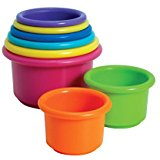

In [8]:
response2 = requests.get(items[1].find("img")["src"], headers=headers)
display.Image(data=response2.content)

In [24]:
[x.find("a")["href"] for x in root.find_all("span", class_="pagnLink")][0]

'/s/ref=sr_pg_2/140-8813243-2201760?fst=as%3Aoff&rh=n%3A165793011%2Cn%3A%21165795011%2Cn%3A196601011%2Cp_n_age_range%3A165813011%2Cp_72%3A1248966011&page=2&bbn=196601011&ie=UTF8&qid=1524683498'

In [33]:
import pickle

In [48]:
# ....
urls = []
all_items = []
with open("output.pkl", "rb") as f:
    while True:
        try:
            urls.append(pickle.load(f, encoding='bytes'))
            all_items += pickle.load(f, encoding='bytes')
        except:
            break
all_items = [{k.decode("utf-8"):v for k,v in item.items()} for item in all_items]        
df = pd.DataFrame(all_items)

In [40]:
df.iloc[0]

img_data       b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
img_link       https://images-na.ssl-images-amazon.com/images...
link           https://www.amazon.com/VTech-Stand-Learning-Fr...
name           VTech Sit-to-Stand Learning Walker (Frustratio...
num_ratings                                                7,665
price                                                      24.88
stars                                         4.7 out of 5 stars
Name: 0, dtype: object

## Visualization and cleaning

In [49]:
df["num_ratings"] = df["num_ratings"].apply(lambda x : float(x.replace(",","")))
df["stars"] = df["stars"].apply(lambda x : float(x.split()[0]))
df["rating"] = (df["stars"]-1)/4

(array([ 872.,  531.,    0.,  636.,  227.,  480.,  423.,  328.,  357.,
         286.,  291.,  190.,  169.,  134.,  119.,   81.,   56.,   40.,
          37.,   12.,   13.,    4.,    1.,    1.,    1.]),
 array([ 0.        ,  0.15538049,  0.31076097,  0.46614146,  0.62152195,
         0.77690243,  0.93228292,  1.0876634 ,  1.24304389,  1.39842438,
         1.55380486,  1.70918535,  1.86456584,  2.01994632,  2.17532681,
         2.3307073 ,  2.48608778,  2.64146827,  2.79684875,  2.95222924,
         3.10760973,  3.26299021,  3.4183707 ,  3.57375119,  3.72913167,
         3.88451216]),
 <a list of 25 Patch objects>)

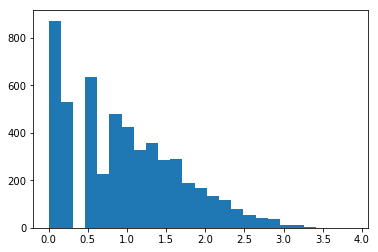

In [52]:
plt.hist(np.log10(df["num_ratings"]), bins=25)

(array([  1.36000000e+02,   2.00000000e+00,   1.00000000e+00,
          1.20000000e+01,   3.00000000e+00,   9.00000000e+00,
          9.10000000e+01,   1.00000000e+01,   2.90000000e+01,
          3.60000000e+01,   4.60000000e+01,   8.10000000e+01,
          2.49000000e+02,   9.40000000e+01,   1.05000000e+02,
          2.36000000e+02,   2.35000000e+02,   1.24000000e+02,
          5.65000000e+02,   2.31000000e+02,   4.86000000e+02,
          6.71000000e+02,   2.85000000e+02,   4.91000000e+02,
          1.06100000e+03]),
 array([ 0.  ,  0.04,  0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,
         0.36,  0.4 ,  0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,
         0.72,  0.76,  0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ]),
 <a list of 25 Patch objects>)

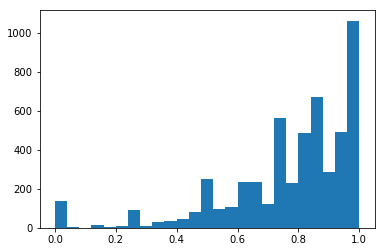

In [53]:
plt.hist(df["rating"], bins=25)

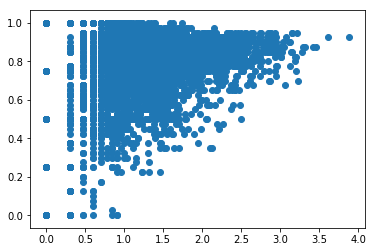

In [54]:
plt.scatter(np.log10(df["num_ratings"]), df["rating"])

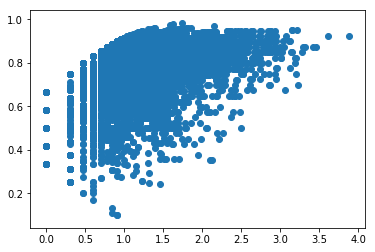

In [56]:
df["bayes_rating"] = (df["rating"]*df["num_ratings"] + 1)/(df["num_ratings"]+2)
plt.scatter(np.log10(df["num_ratings"]), df["bayes_rating"])

(array([   2.,    2.,    7.,   67.,  123.,  282.,  508.,  636.,  778.,
         582.,  544.,  402.,  223.,  166.,  140.,   75.,   61.,   54.,
          27.,   21.,   13.,   13.,    8.,    3.,    4.]),
 array([ 0.30103   ,  0.40035322,  0.49967645,  0.59899968,  0.6983229 ,
         0.79764613,  0.89696936,  0.99629259,  1.09561581,  1.19493904,
         1.29426227,  1.3935855 ,  1.49290872,  1.59223195,  1.69155518,
         1.7908784 ,  1.89020163,  1.98952486,  2.08884809,  2.18817131,
         2.28749454,  2.38681777,  2.486141  ,  2.58546422,  2.68478745,
         2.78411068]),
 <a list of 25 Patch objects>)

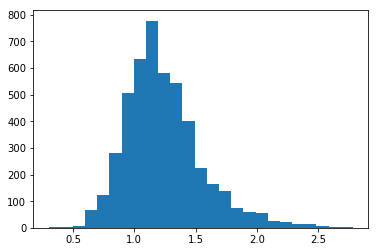

In [60]:
plt.hist(np.log10(df["price"][~pd.isnull(df["price"])]), bins=25)

In [66]:
df.dropna(subset=["price"], inplace=True)

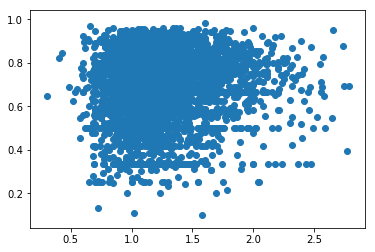

In [67]:
plt.scatter(np.log10(df["price"]), df["bayes_rating"])

In [69]:
df.sort_values(by=["bayes_rating"], ascending=False, inplace=True)

In [77]:
df = df[df["num_ratings"]>4].copy()

## First (rarely successful) take on machine learning

(array([   3.,    0.,    0.,    0.,    7.,    8.,    7.,   14.,   18.,
          30.,   51.,   95.,   61.,   98.,  120.,  137.,  177.,  191.,
         284.,  306.,  354.,  420.,  282.,  169.,   30.]),
 array([ 0.1       ,  0.13531034,  0.17062069,  0.20593103,  0.24124138,
         0.27655172,  0.31186207,  0.34717241,  0.38248276,  0.4177931 ,
         0.45310345,  0.48841379,  0.52372414,  0.55903448,  0.59434483,
         0.62965517,  0.66496552,  0.70027586,  0.73558621,  0.77089655,
         0.8062069 ,  0.84151724,  0.87682759,  0.91213793,  0.94744828,
         0.98275862]),
 <a list of 25 Patch objects>)

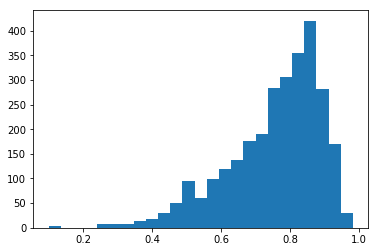

In [71]:
plt.hist(df["bayes_rating"], bins=25)

In [72]:
import scipy.stats as stats

((array([-3.48928144, -3.24473462, -3.10945565, ...,  3.10945565,
          3.24473462,  3.48928144]),
  array([-4.82221368, -4.74038871, -4.59719502, ...,  1.53285887,
          1.57291902,  1.67863899])),
 (0.96379292970860975, -1.5012366220867113e-14, 0.96273485542964321))

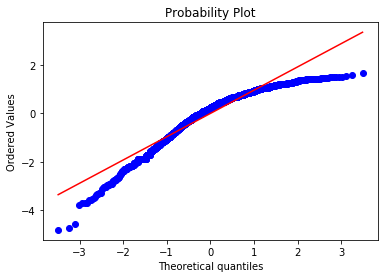

In [74]:
stats.probplot((df["bayes_rating"] - np.mean(df["bayes_rating"]))/np.std(df["bayes_rating"]),plot=plt)

In [78]:
df["logit_rating"] = np.log(df["bayes_rating"]/(1-df["bayes_rating"]))

(array([   2.,    1.,    0.,    0.,    7.,    9.,   26.,   36.,  119.,
         132.,  192.,  231.,  295.,  373.,  388.,  368.,  253.,  199.,
         139.,   41.,   39.,   10.,    1.,    0.,    1.]),
 array([-2.19722458, -1.94761354, -1.69800251, -1.44839148, -1.19878044,
        -0.94916941, -0.69955837, -0.44994734, -0.20033631,  0.04927473,
         0.29888576,  0.54849679,  0.79810783,  1.04771886,  1.2973299 ,
         1.54694093,  1.79655196,  2.046163  ,  2.29577403,  2.54538506,
         2.7949961 ,  3.04460713,  3.29421817,  3.5438292 ,  3.79344023,
         4.04305127]),
 <a list of 25 Patch objects>)

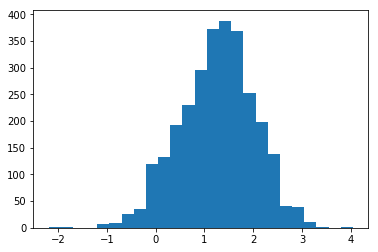

In [80]:
plt.hist(df["logit_rating"], bins=25)

((array([-3.48928144, -3.24473462, -3.10945565, ...,  3.10945565,
          3.24473462,  3.48928144]),
  array([-4.51810781, -4.36408863, -4.1242837 , ...,  2.61555149,
          2.83063709,  3.64199879])),
 (0.99837230177810776, -3.1765360099430616e-16, 0.99727626546078196))

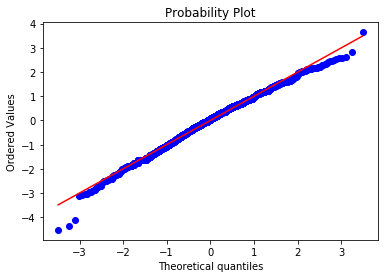

In [81]:
stats.probplot((df["logit_rating"] - np.mean(df["logit_rating"]))/np.std(df["logit_rating"]),plot=plt)

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=10, max_df=0.3, ngram_range=(1,3))


X_tfidf = tfidf.fit_transform(df["name"]).toarray()
X = np.hstack([X_tfidf, np.log(df[["price"]]).values])
y = df["logit_rating"].values

In [89]:
from sklearn.model_selection import train_test_split
X_, X_test, y_, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_, y_, test_size = 0.3, random_state=0)

In [92]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [95]:
print("Training MSE: ", np.mean((clf.predict(X_train) - y_train)**2))
print("Baseline training MSE: ", np.mean((np.mean(y_train) - y_train)**2))

Training MSE:  0.360494880774
Baseline training MSE:  0.57679763421


In [96]:
print("CV MSE: ", np.mean((clf.predict(X_cv) - y_cv)**2))
print("Baseline CV MSE: ", np.mean((np.mean(y_train) - y_cv)**2))

CV MSE:  0.520905076355
Baseline CV MSE:  0.564067894636


In [97]:
print("Test MSE: ", np.mean((clf.predict(X_test) - y_test)**2))
print("Baseline Test MSE: ", np.mean((np.mean(y_train) - y_test)**2))

Test MSE:  0.580434242679
Baseline Test MSE:  0.612558622219


## Playing a game

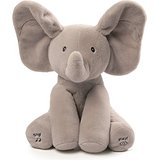

Gund Baby Animated Flappy The Elephant Plush Toy
$39.99


In [99]:
def display_item(s):
    display.display(display.Image(data = s["img_data"]))
    print(s["name"])
    print("$" + str(np.round(s["price"],3)))


In [101]:
def ranking_game():
    it1 = np.random.randint(len(df))
    it2 = np.random.randint(len(df))
    
    display_item(df.iloc[it1])
    print("-------")
    display_item(df.iloc[it2])
    print("-------")
    
    guess = int(input("Which item is rated higher (1/2)?"))
    
    print("True Rating: {} / {}".format(df.iloc[it1]["bayes_rating"], df.iloc[it2]["bayes_rating"]))
    correct = ((guess == 1) and (it1 < it2)) or ((guess == 2) and (it1 > it2))
    print("{}".format("Correct!" if correct else "Incorrect!"))

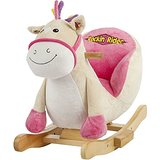

Rockin' Rider Giggles Baby Rocker Ride On
$84.33
-------


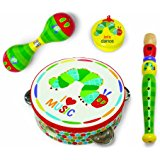

World of Eric Carle, The Very Hungry Caterpillar Instrument Gift Set - Boxed
$18.37
-------
Which item is rated higher (1/2)?2
True Rating: 0.8571428571428571 / 0.6583333333333334
Incorrect!


In [106]:
ranking_game()

In [108]:
def ranking_game2():
    it1 = np.random.randint(len(df)//10)
    it2 = np.random.randint(len(df)//10) + 9*len(df)//10
    if np.random.rand() < 0.5:
        it1,it2 = (it2,it1)
    
    display_item(df.iloc[it1])
    print("-------")
    display_item(df.iloc[it2])
    print("-------")
    
    guess = int(input("Which item is rated higher (1/2)?"))
    
    print("True Rating: {} / {}".format(df.iloc[it1]["bayes_rating"], df.iloc[it2]["bayes_rating"]))
    correct = ((guess == 1) and (it1 < it2)) or ((guess == 2) and (it1 > it2))
    print("{}".format("Correct!" if correct else "Incorrect!"))

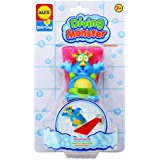

ALEX Toys Rub a Dub Diving Monster
$7.45
-------


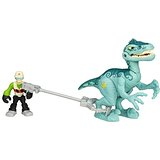

Jurassic World Velociraptor
$7.89
-------
Which item is rated higher (1/2)?2
True Rating: 0.5535714285714286 / 0.9139999999999999
Correct!


In [118]:
ranking_game2()